# Workshop 6

Starter code for workshop 6. You should have seen most of it before, but make sure you understand what it is doing!

In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To plot even prettier figures
import seaborn as sn

# General data handling (pure numerics are better in numpy)
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
# Extract the feature and target
xarray = data.data
yarray = data.target
print(xarray.shape)
print(yarray.shape)
fullarray = np.concatenate((xarray,np.reshape(yarray,(-1,1))),axis=1)
print(fullarray.shape)

(569, 30)
(569,)
(569, 31)


### Viewing the data
One thing we haven't done with this dataset is actually look at some of the data

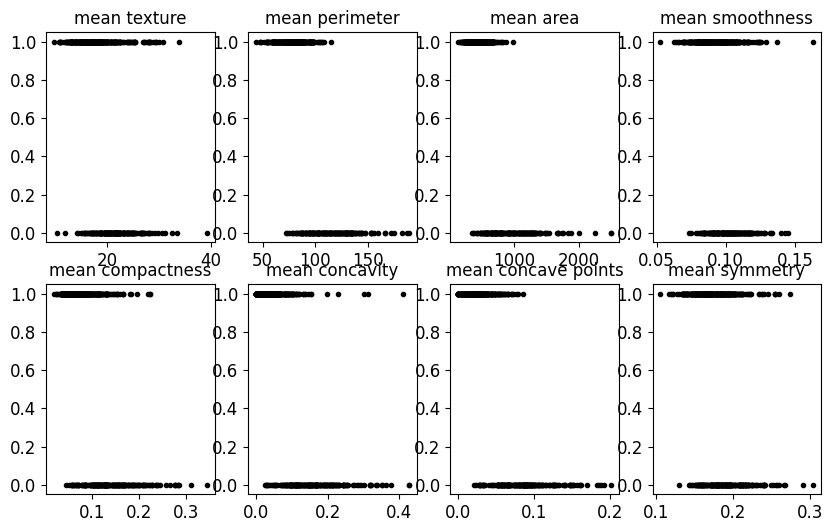

In [4]:
## Let's be a bit more imaginative

 # Define a proper size of the plot
plt.figure(figsize=(10,6))

# Check the relation between each variable and the target
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.plot(fullarray[:, i], fullarray[:,-1], 'k.')
    plt.title(data.feature_names[i])

In [5]:
# Remember to define properly the positive and negative class
fullarray[:,-1] = 1 - fullarray[:,-1]   # now invert the labels (so that malignant=1)
df = pd.DataFrame(fullarray,columns = list(data.feature_names) + ['target'])

In [6]:
# Check the dataframe
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.0


# Splitting into separate datasets

In [7]:
from sklearn.model_selection import train_test_split

# Split in train, validation and test. Check the parameter "stratify"
bigtrain_set, test_set = train_test_split(fullarray, test_size=0.15, random_state=42, stratify=fullarray[:,-1])
train_set, val_set = train_test_split(bigtrain_set, test_size=0.1765, random_state=42, stratify=bigtrain_set[:,-1])

**Note the use of "stratify" in the calls above, as these make sure that each dataset has roughly the same proportions of the classes.**

In [8]:
#Get the X and y for train, val and test
X_train = train_set[:,:-1]
y_train = train_set[:,-1]
X_test = test_set[:,:-1]
y_test = test_set[:,-1]
X_val = val_set[:,:-1]
y_val = val_set[:,-1]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(397, 30), (397,), (86, 30), (86,), (86, 30), (86,)]


In [9]:
# You can see the proportion of the classes in each partition
print(np.mean(y_train),np.mean(y_test),np.mean(y_val))

0.37279596977329976 0.37209302325581395 0.37209302325581395


These are the proportions of the classes in each dataset (as classes are given values 0 and 1, so a mean is just equal to the proportion of the class represented by 1).

# Pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preproc_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler())])

# SVM Classifier

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

### Build a pipeline


In [12]:
svm_lin = Pipeline([('preproc',preproc_pl), ('svc',SVC(kernel='linear'))])

# Train, Predict, Accuracy
svm_lin.fit(X_train, y_train)
y_val_pred = svm_lin.predict(X_val)
acc = accuracy_score(y_val, y_val_pred)
print("Accuracy: ", acc)

Accuracy:  0.9651162790697675


### AUC/feature

For each feature, we will rescale the features by their max and min values (to get them into range). Then, we will build some ROC curves, considering the values of each feature as `predictions` for the target variable. This is a good way to build a baseline for a binary classification problem.

In [13]:
# We run over all the features
for n in range(X_train.shape[1]):
    # Pick up one feature
    xfeat = X_train[:,n]
    # Extract the min and max value per feature
    xmin = np.min(xfeat)
    xmax = np.max(xfeat)
    # Calculate 'predictions' transforming each feature in a range of 0 and 1
    y_pred = (xfeat - xmin)/(xmax - xmin)

    # Get the ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    # Get the AUC: Remember. An AUC close to 1 means a better model
    aucval = auc(fpr, tpr)
    # In the case that AUC value is lower than 0.5, we can consider the complement. Why? Try to figure out
    if aucval < 0.5: aucval = 1 - aucval
    # Also, we go to get the accuracy using different thresholds and choose the best case
    best_acc = 0
    best_thr = 0
    for thr in xfeat:
        accuracy_cases = accuracy_score(y_train, y_pred>thr)
        if accuracy_cases > best_acc:
            best_acc = accuracy_cases
            best_thr = thr
    print(f'AUC for feature {n} = {aucval} ; Max accuracy = {best_acc} using the threshold {best_thr}')

AUC for feature 0 = 0.9323238901552154 ; Max accuracy = 0.6272040302267002 using the threshold 23.51
AUC for feature 1 = 0.7769727558884185 ; Max accuracy = 0.6272040302267002 using the threshold 24.27
AUC for feature 2 = 0.94104797568653 ; Max accuracy = 0.6272040302267002 using the threshold 155.1
AUC for feature 3 = 0.9330294149571259 ; Max accuracy = 0.6272040302267002 using the threshold 1747.0
AUC for feature 4 = 0.7260664278736568 ; Max accuracy = 0.4256926952141058 using the threshold 0.1425
AUC for feature 5 = 0.8522196895690872 ; Max accuracy = 0.783375314861461 using the threshold 0.2776
AUC for feature 6 = 0.9225822207749919 ; Max accuracy = 0.8664987405541562 using the threshold 0.2414
AUC for feature 7 = 0.9548057093237816 ; Max accuracy = 0.8589420654911839 using the threshold 0.2012
AUC for feature 8 = 0.6691767068273093 ; Max accuracy = 0.48866498740554154 using the threshold 0.2906
AUC for feature 9 = 0.5486405079778574 ; Max accuracy = 0.3677581863979849 using the th

### ROC Curves

Beautiful, beautiful ROC curves. You should play with the [6, 9] (it is just a list of the ones to display). That way you can see how good each one is at predicting things.

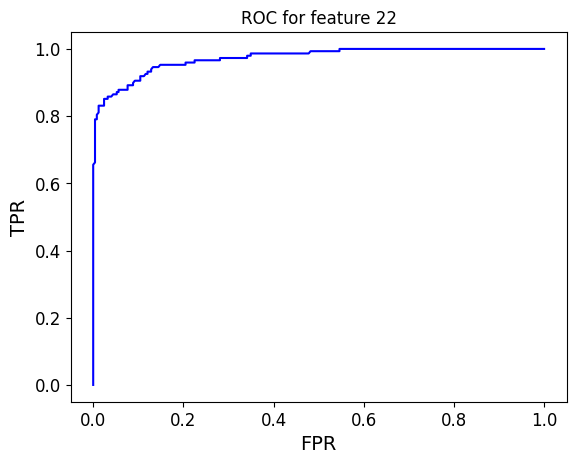

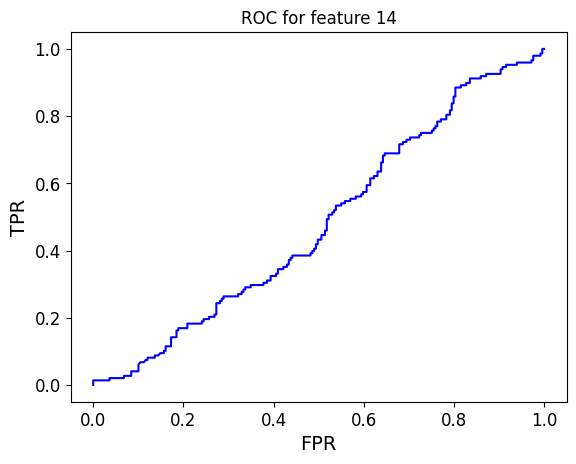

In [14]:
for n in [22, 14]:  # Best and worst feature numbers
    xfeat = X_train[:,n]
    xmin = np.min(xfeat)
    xmax = np.max(xfeat)
    y_pred = (xfeat-xmin)/(xmax-xmin)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1)
    plt.plot(fpr,tpr,'b')
    plt.title(f'ROC for feature {n}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

Note that the worst feature is not the one with the lowest AUC, it is the one with the AUC closest to 0.5, as ones less than this are simply inverted features and could be negated to get positive performance (with AUC>0.5).

### Visualize our result

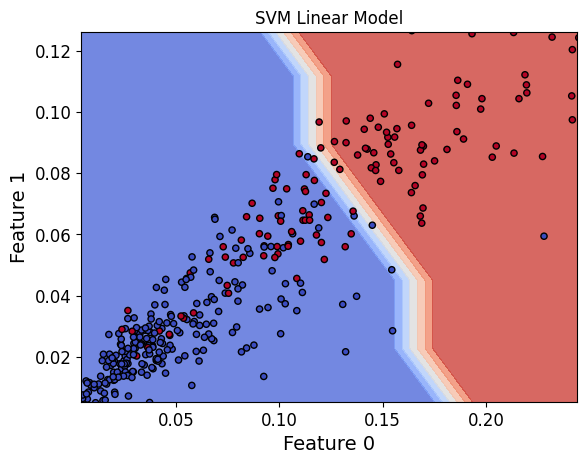

In [18]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# We can pick up two of the best features
feature0 = 6
feature1 = 7

# For each one, extract the percentil 5 and 95. These values are useful to define the limits of our plot
x05, x95 = np.percentile(X_train[:,feature0],[5,95])
y05, y95 = np.percentile(X_train[:,feature1],[5,95])

# Create a new pipeline with SVC and a specific kernel
svm_model = SVC(kernel='linear', C=1)

# Define two features. We go to use the best two features identified in the previous step
feat1, feat2 = X_train[:, feature0], X_train[:, feature1]

# Train again our model using only the two features 
svm_model.fit(X_train[:, [feature0, feature1]], y_train)

# We can plot a DecisionBoundary
disp = DecisionBoundaryDisplay.from_estimator(
    svm_model,                            # Define the model
    train_set[:,[feature0,feature1]],     # Define the data
    response_method="predict",            # Define the method used to create the boundary
    cmap=plt.cm.coolwarm,                 # Color palette
    alpha=0.8,                            # Transparency
    xlabel= "Feature 0",                  # Label 1
    ylabel= "Feature 1")                  # Label 2
# We can plot the data with its true classes
plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

# Define the limit values of the plot
plt.xlim([x05,x95])
plt.ylim([y05,y95])
plt.title("SVM Linear Model")
plt.show()

In [16]:
# If you have problems running the function DecisionBoundaryDisplay, tries to run the next piece of code in terminal

# pip install -U scikit-learn

# If thi does not work, try first to uninstall sklearn using

# 1) pip uninstall sklear
# 2) pip uninstall scikit-learn
# 3) pip install -U scikit-learn

### Validation
Let's have another look, this time using validation rather than training.

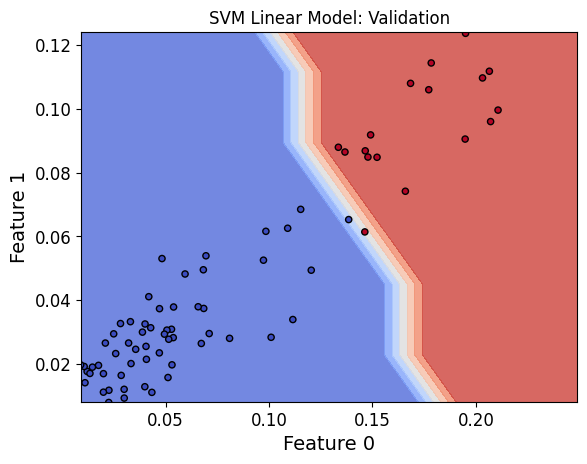

In [22]:
feature0 = 6
feature1 = 7

x05, x95 = np.percentile(X_val[:,feature0],[5,95])
y05, y95 = np.percentile(X_val[:,feature1],[5,95])

# Create a new pipeline with SVC and a specific kernel
# C = regularization parameter

svm_model = SVC(kernel='linear', C=1)

# Define two features. We go to use the best two features identified in the previous step
feat1_val, feat2_val = X_val[:, feature0], X_val[:, feature1]

# Train again our model using only the two features 
svm_model.fit(X_train[:, [feature0, feature1]], y_train)

# We can plot a DecisionBoundaary
disp = DecisionBoundaryDisplay.from_estimator(
    svm_model,                            # Define the model
    train_set[:,[feature0,feature1]],     # Define the data
    response_method="predict",            # Define the method used to create the boundary
    cmap=plt.cm.coolwarm,                 # Color palette
    alpha=0.8,                            # Transparency
    xlabel= "Feature 0",                  # Label 1
    ylabel= "Feature 1")                  # Label 2
# We can plot the data with its true classes
plt.scatter(feat1_val, feat2_val, c = svm_model.predict(val_set[:,[feature0,feature1]]), cmap=plt.cm.coolwarm, s=20, edgecolors="k")

# Define the limit values of the plot
plt.xlim([x05,x95])
plt.ylim([y05,y95])
plt.title("SVM Linear Model: Validation")
plt.show()

### Fiddling with C Values
C is a regularisation parameter. The higher the C, the bigger the margin (it is ignoring misclassifications).

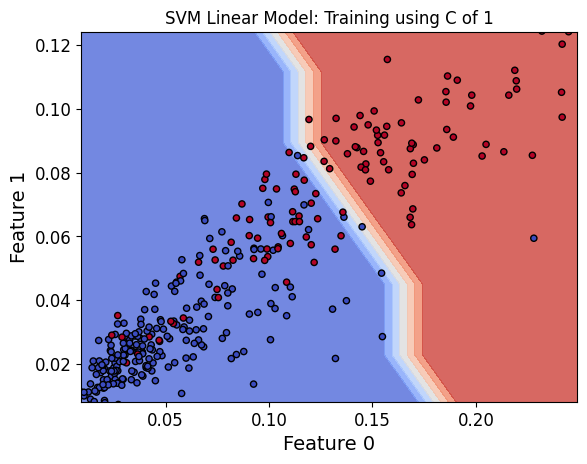

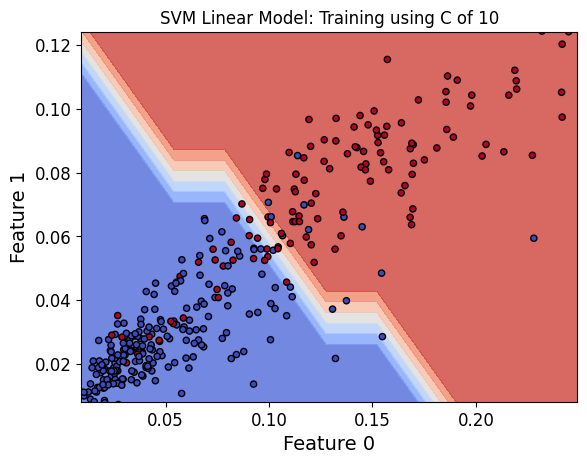

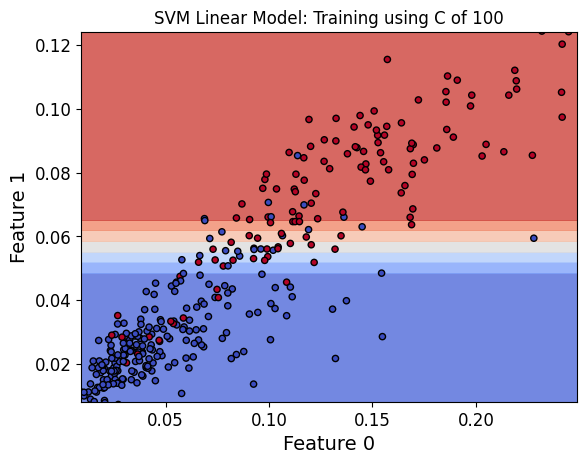

In [23]:
feature0 = 6
feature1 = 7

x05, x95 = np.percentile(X_val[:,feature0],[5,95])
y05, y95 = np.percentile(X_val[:,feature1],[5,95])

# We choose different values of C
for c_index, c_choices in enumerate([1, 10, 100]):
    # Create a new pipeline with SVC and a specific kernel
    # C = regularization parameter
    svm_model = SVC(kernel='linear', C=c_choices)

    # Define two features. We go to use the best two features identified in the previous step
    feat1, feat2 = X_train[:, feature0], X_train[:, feature1]

    # Train again our model using only the two features 
    svm_model.fit(X_train[:, [feature0, feature1]], y_train)    

    # We can plot a DecisionBoundaary
    disp = DecisionBoundaryDisplay.from_estimator(
        svm_model,                            # Define the model
        train_set[:,[feature0,feature1]],     # Define the data
        response_method="predict",            # Define the method used to create the boundary
        cmap=plt.cm.coolwarm,                 # Color palette
        alpha=0.8,                            # Transparency
        xlabel= "Feature 0",                  # Label 1
        ylabel= "Feature 1")                  # Label 2
    # We can plot the data with its true classes
    plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

    # Define the limit values of the plot
    plt.xlim([x05,x95])
    plt.ylim([y05,y95])
    plt.title(f"SVM Linear Model: Training using C of {c_choices}")
    plt.show()

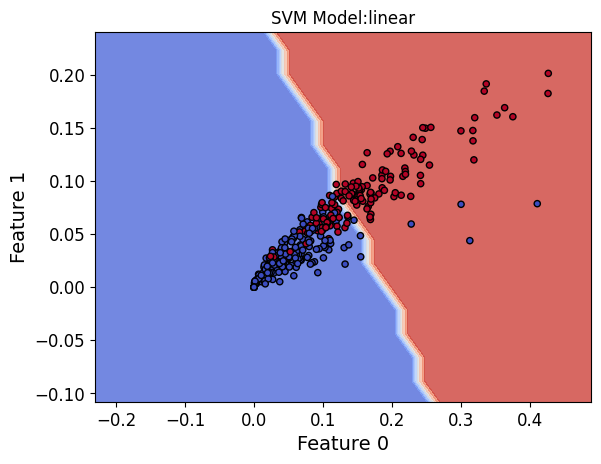

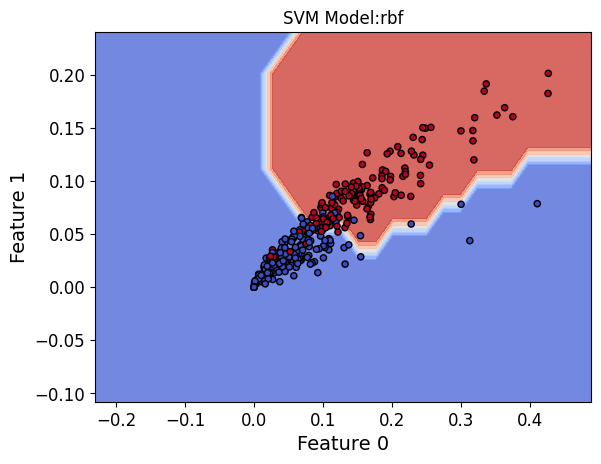

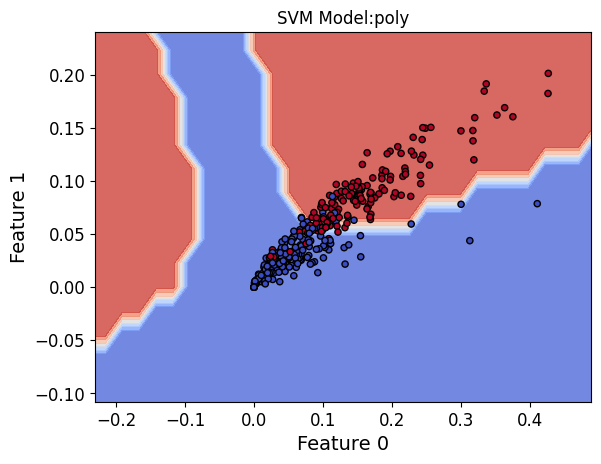

In [24]:
feature0 = 6
feature1 = 7

x05, x95 = np.percentile(X_val[:,feature0],[5,95])
y05, y95 = np.percentile(X_val[:,feature1],[5,95])


# Also, we use different kernel types
for kernel_type in ['linear', 'rbf', 'poly']:
    # Create a new pipeline with SVC and a specific kernel
    svm_model = SVC(kernel=kernel_type, C = 1) # C = regularization parameter

    # Define two features. We go to use the best two features identified in the previous step
    feat1, feat2 = X_train[:, feature0], X_train[:, feature1]
    feat1_val, feat2_val = X_val[:, feature0], X_val[:, feature1]

    # Train again our model using only the two features 
    svm_model.fit(X_train[:,[feature0,feature1]],y_train)

    # We can plot a DecisionBoundaary
    disp = DecisionBoundaryDisplay.from_estimator(
        svm_model,                            # Define the model
        train_set[:,[feature0,feature1]],     # Define the data
        response_method="predict",            # Define the method used to create the boundary
        cmap=plt.cm.coolwarm,                 # Color palette
        alpha=0.8,                            # Transparency
        xlabel= "Feature 0",                  # Label 1
        ylabel= "Feature 1")                  # Label 2
    # We can plot the data with its true classes
    plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

    # Define the limit values of the plot
    plt.xlim([2 * x05 - x95, 2 * x95 - x05])
    plt.ylim([2 * y05 - y95, 2 * y95 - y05])
    plt.title("SVM Model:" + kernel_type)
    plt.show()

### Let's play some more


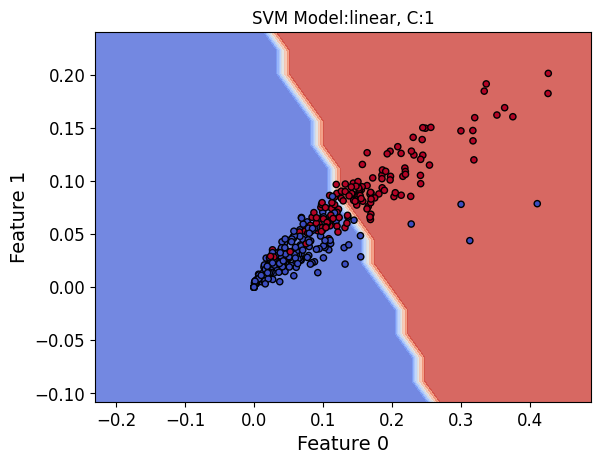

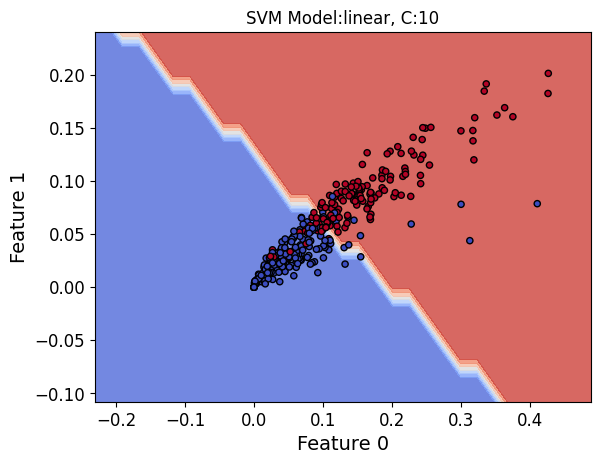

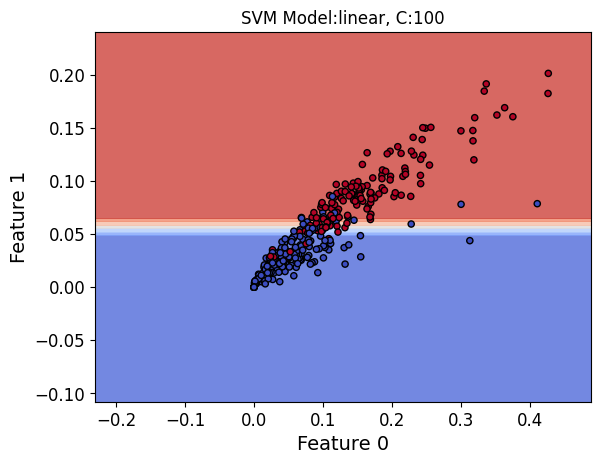

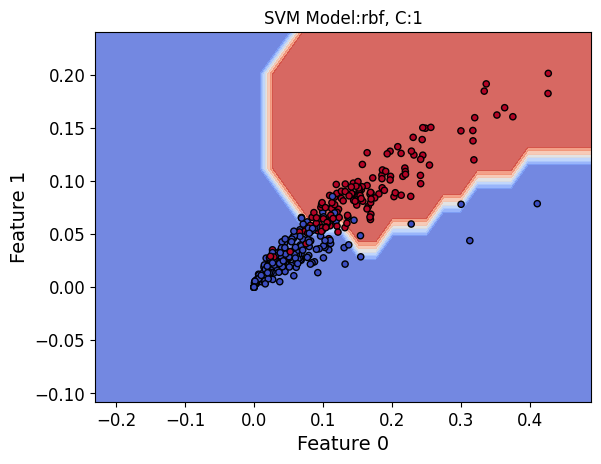

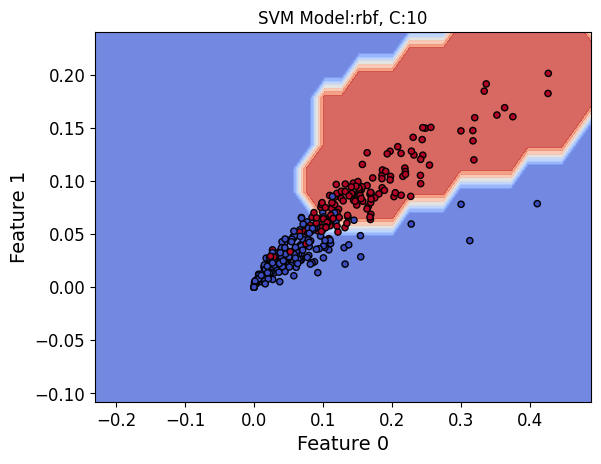

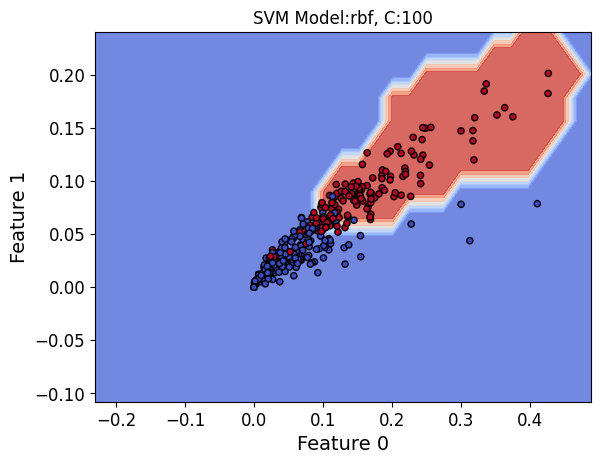

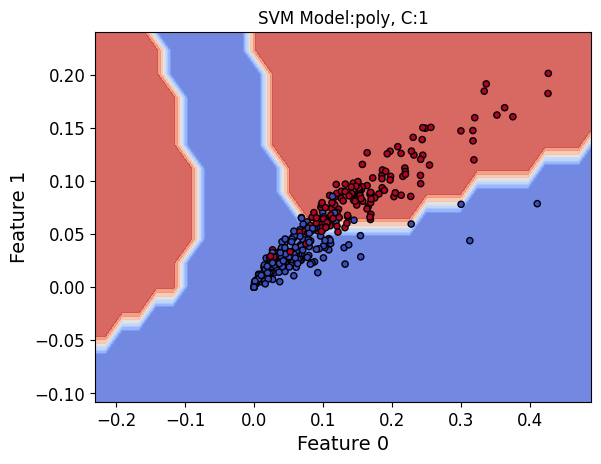

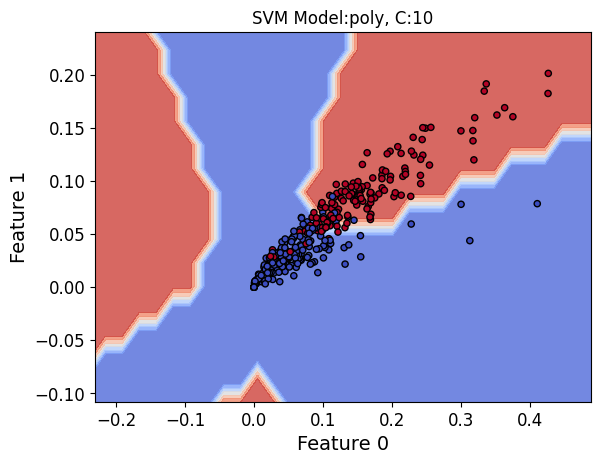

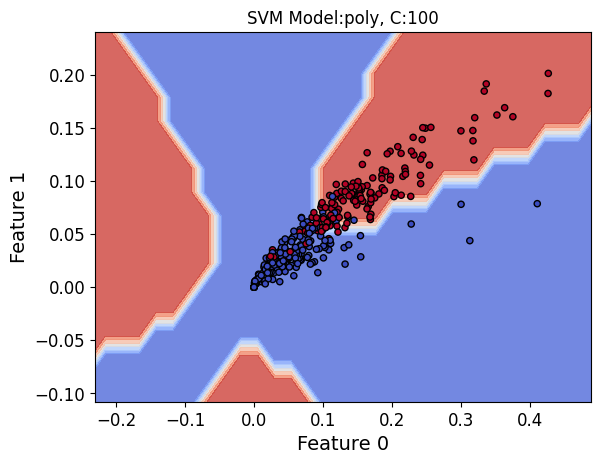

In [25]:
feature0 = 6
feature1 = 7

x05, x95 = np.percentile(X_val[:,feature0],[5,95])
y05, y95 = np.percentile(X_val[:,feature1],[5,95])

# Choose different kernel and C
for kernel_type in ['linear', 'rbf', 'poly']:
    for c_choice in [1, 10, 100]:
        # Create a new pipeline with SVC and a specific kernel
        svm_model = SVC(kernel=kernel_type, C = c_choice) # C = regularization parameter

        # Define two features. We go to use the best two features identified in the previous step
        feat1, feat2 = X_train[:, feature0], X_train[:, feature1]
        feat1_val, feat2_val = X_val[:, feature0], X_val[:, feature1]

        # Train again our model using only the two features 
        svm_model.fit(X_train[:,[feature0,feature1]],y_train)

        # We can plot a DecisionBoundaary
        disp = DecisionBoundaryDisplay.from_estimator(
            svm_model,                            # Define the model
            train_set[:,[feature0,feature1]],     # Define the data
            response_method="predict",            # Define the method used to create the boundary
            cmap=plt.cm.coolwarm,                 # Color palette
            alpha=0.8,                            # Transparency
            xlabel= "Feature 0",                  # Label 1
            ylabel= "Feature 1")                  # Label 2
        # We can plot the data with its true classes
        plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

        # Define the limit values of the plot
        plt.xlim([2 * x05 - x95, 2 * x95 - x05])
        plt.ylim([2 * y05 - y95, 2 * y95 - y05])
        plt.title("SVM Model:" + kernel_type + ", C:" + str(c_choice))
        plt.show()

## Model selection

In [28]:
for kernel_type in ['linear', 'rbf', 'poly']:
    for c_choice in [1, 10, 30, 50, 100]:
        svm_pl = Pipeline([('preproc', preproc_pl), ('svc', SVC(kernel=kernel_type, C=c_choice))])
        svm_pl.fit(X_train, y_train)

        y_val_pred = svm_pl.predict(X_val)
        acc = accuracy_score(y_val, y_val_pred)
        print(acc)

0.9651162790697675
0.9534883720930233
0.9418604651162791
0.9418604651162791
0.9302325581395349
0.9767441860465116
0.9883720930232558
1.0
1.0
0.9883720930232558
0.8953488372093024
0.9651162790697675
0.9767441860465116
0.9651162790697675
0.9651162790697675


### Choose RBF as best classifier as it has the best performance on the _validation_ set

In [30]:
best_kernel = 'rbf'
best_c = 30

svm_pl = Pipeline([('preproc_pl', preproc_pl), ('svc', SVC(kernel=best_kernel, C = best_c))])
svm_pl.fit(np.concatenate((X_train, X_val), axis =0), np.concatenate((y_train, y_val), axis=0))

,steps,"[('preproc_pl', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('imputer', ...), ('std_scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None


In [31]:
y_test_pred = svm_pl.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)

print(acc)

0.9883720930232558
